In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from loldle_solver.solver import Solver


sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 8)

In [9]:
df = Solver().df
df

name,gender,position,species,resource,range,region,release
str,str,list[str],list[str],str,list[str],list[str],i64
"""Aatrox""","""Male""","[""Top""]","[""Darkin""]","""Manaless""","[""Melee""]","[""Runeterra"", ""Shurima""]",2013
"""Ahri""","""Female""","[""Middle""]","[""Vastayan""]","""Mana""","[""Ranged""]","[""Ionia""]",2011
"""Akali""","""Female""","[""Middle"", ""Top""]","[""Human""]","""Energy""","[""Melee""]","[""Ionia""]",2010
"""Akshan""","""Male""","[""Middle"", ""Top""]","[""Human""]","""Mana""","[""Ranged""]","[""Shurima""]",2021
"""Alistar""","""Male""","[""Support""]","[""Minotaur""]","""Mana""","[""Melee""]","[""Runeterra""]",2009
…,…,…,…,…,…,…,…
"""Ziggs""","""Male""","[""Bottom"", ""Middle""]","[""Yordle""]","""Mana""","[""Ranged""]","[""Zaun""]",2012
"""Zilean""","""Male""","[""Support""]","[""Human"", ""Magicborn""]","""Mana""","[""Ranged""]","[""Icathia"", ""Runeterra"", ""Shurima""]",2009
"""Zoe""","""Female""","[""Middle""]","[""Aspect"", ""Human""]","""Mana""","[""Ranged""]","[""Targon""]",2017


In [71]:
def plot_col(data, ax, list_col=False, order=None):
    name = data.name.capitalize()
    if list_col:
        data = list(np.concatenate(data.to_numpy()))
    if order is not None:
        data = list(data)
        for value in order:
            data.remove(value)
        data = order + data
        data = [str(x) for x in data]
    sns.histplot(data=data, ax=ax)
    ax.set_title(name)

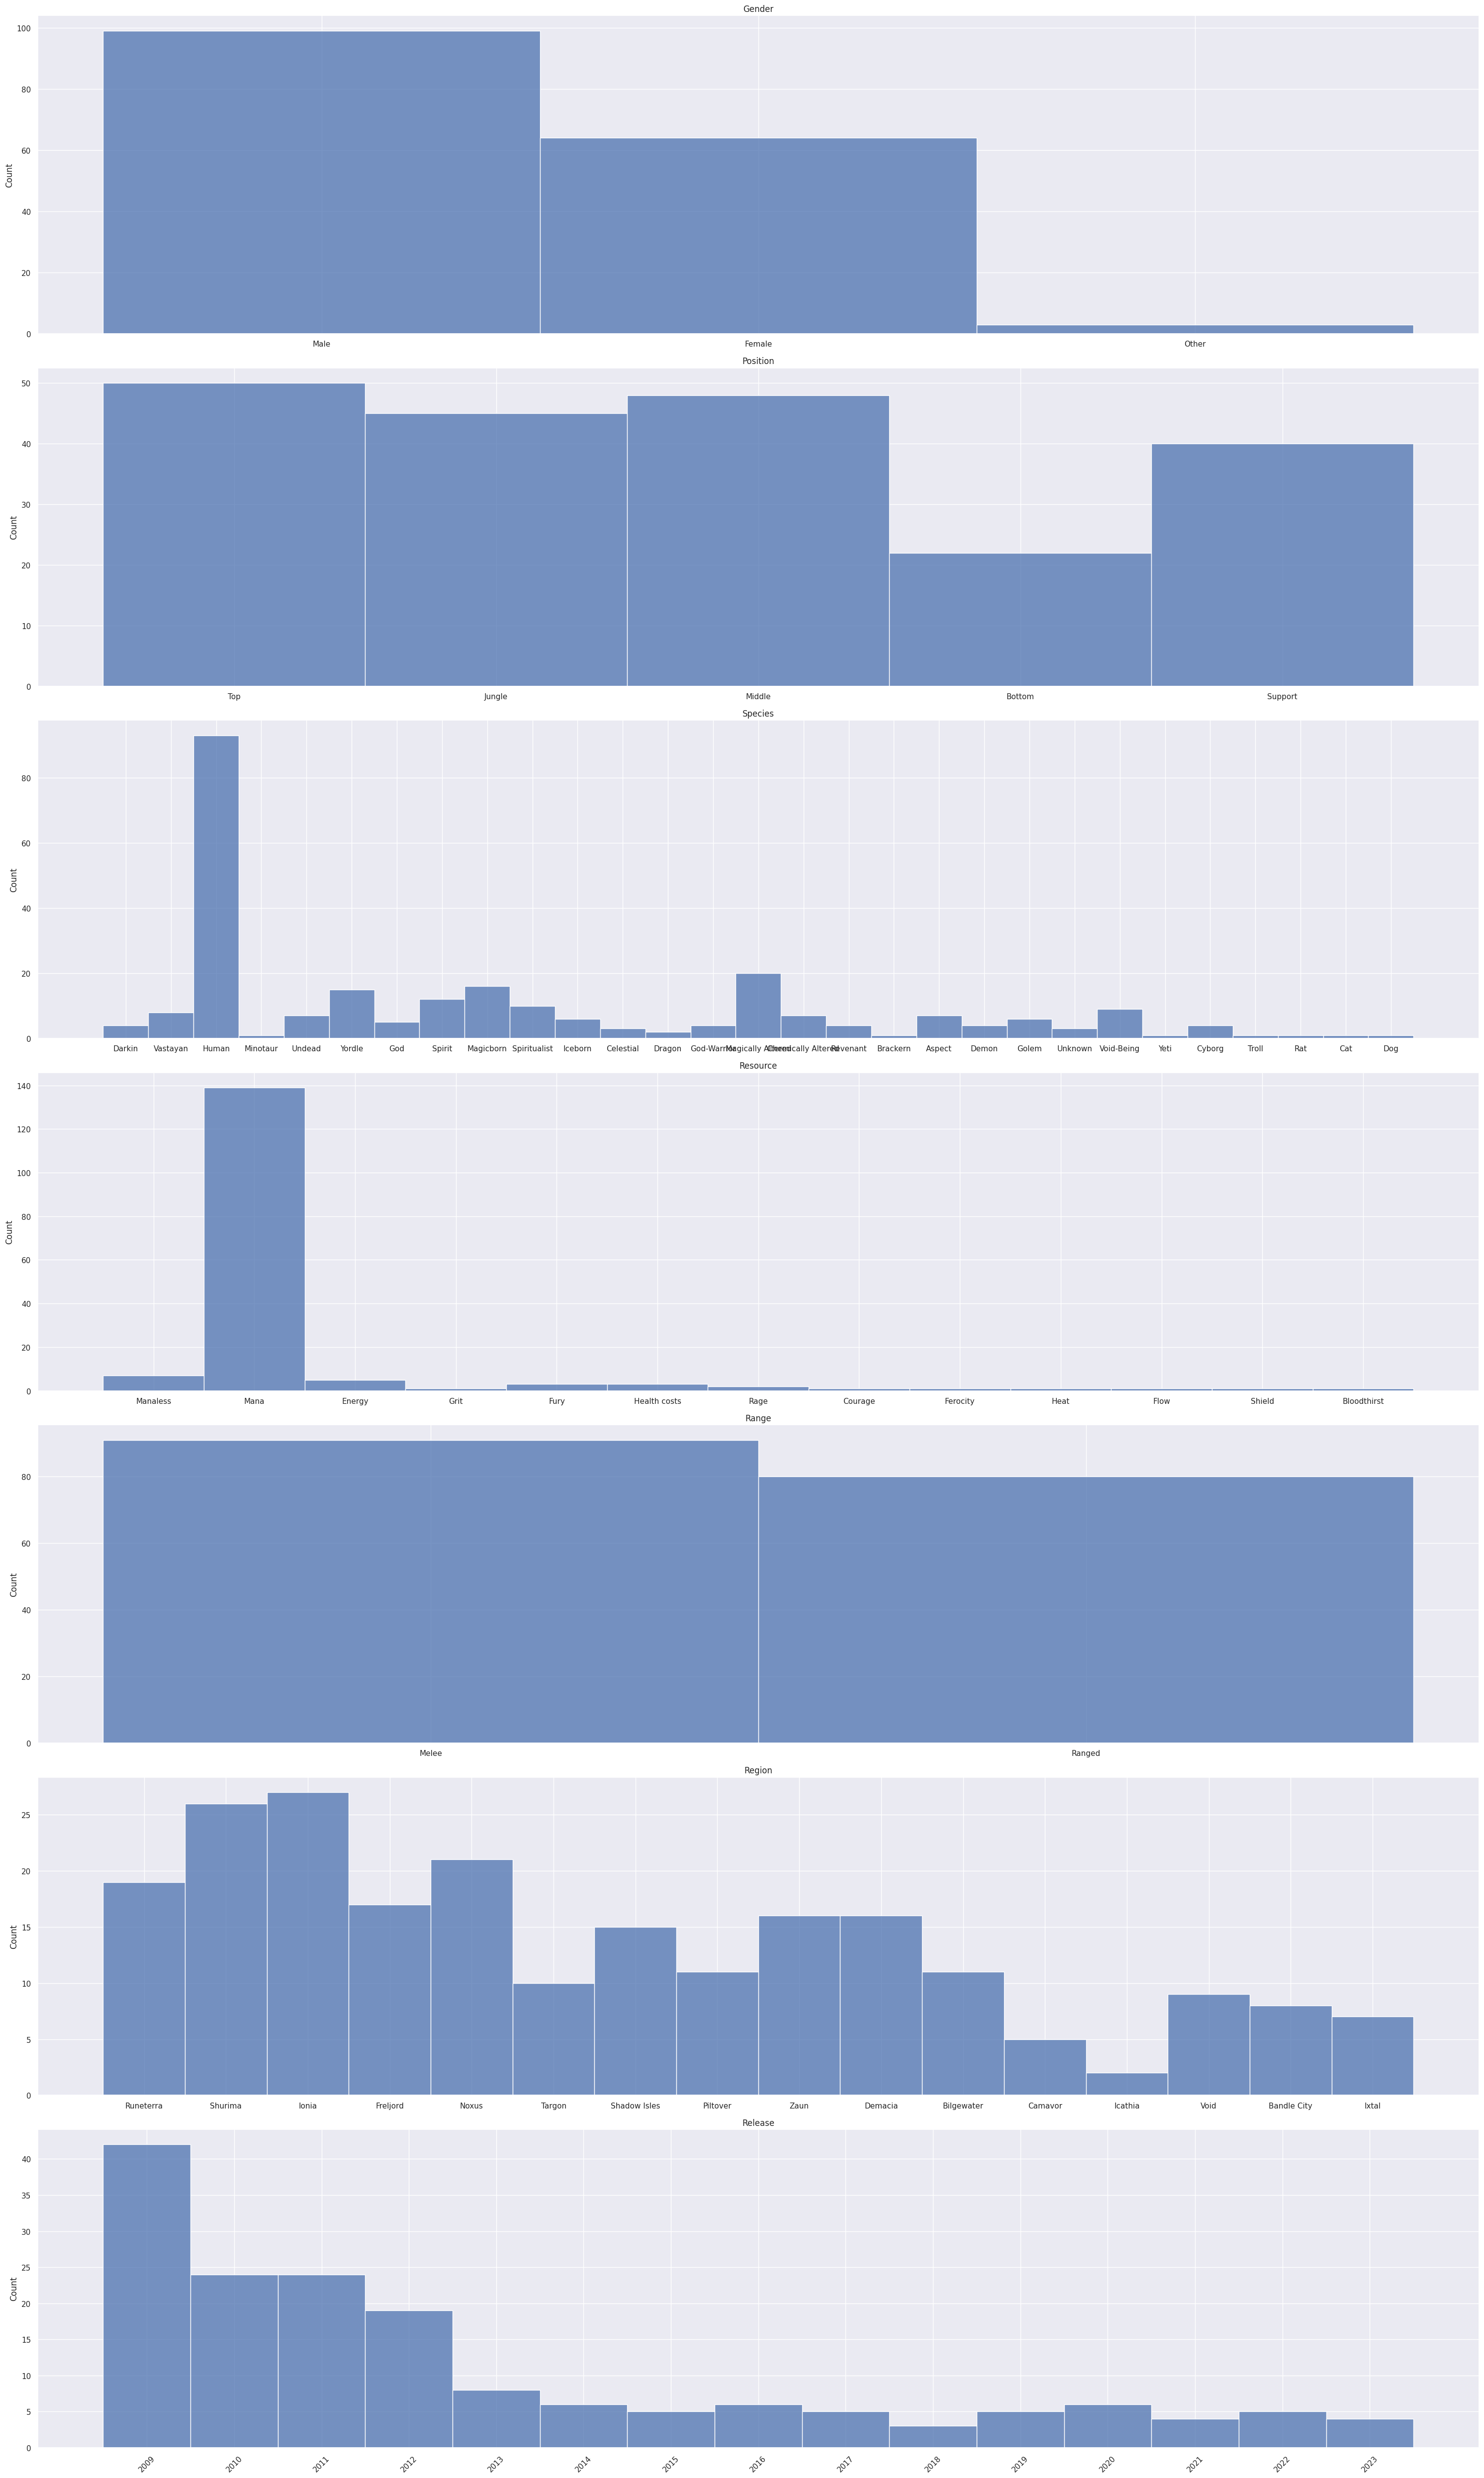

In [72]:
fig, axes = plt.subplots(7, 1, figsize=(30, 50))

plot_col(df["gender"], axes[0])
plot_col(
    df["position"],
    axes[1],
    list_col=True,
    order=["Top", "Jungle", "Middle", "Bottom", "Support"],
)
plot_col(df["species"], axes[2], list_col=True)
plot_col(df["resource"], axes[3])
plot_col(df["range"], axes[4], list_col=True)
plot_col(df["region"], axes[5], list_col=True)
plot_col(df["release"], axes[6], order=list(range(2009, 2024)))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()